In [3]:
import pandas as pd
df = pd.read_csv('train.csv')
print(df.shape, df.info(), df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
dtype: int64

In [6]:
# Fill 'None' where feature is not present
none_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
             'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
             'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
             'MasVnrType']
df[none_cols] = df[none_cols].fillna('None')

# Fill numerical 'area' fields with 0 if feature doesn't exist
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

# Fill 'LotFrontage' using Neighborhood median
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Fill 'Electrical' with mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])


In [7]:
df.isnull().sum().sort_values(ascending=False).head(20)

Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
dtype: int64

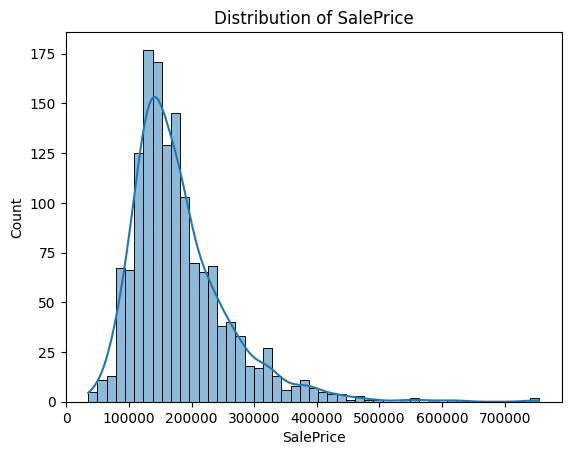

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.show()

In [13]:
# Only numeric columns
numeric = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr_matrix = numeric.corr()

# Correlation with SalePrice
top_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
print(top_corr.head(10))


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


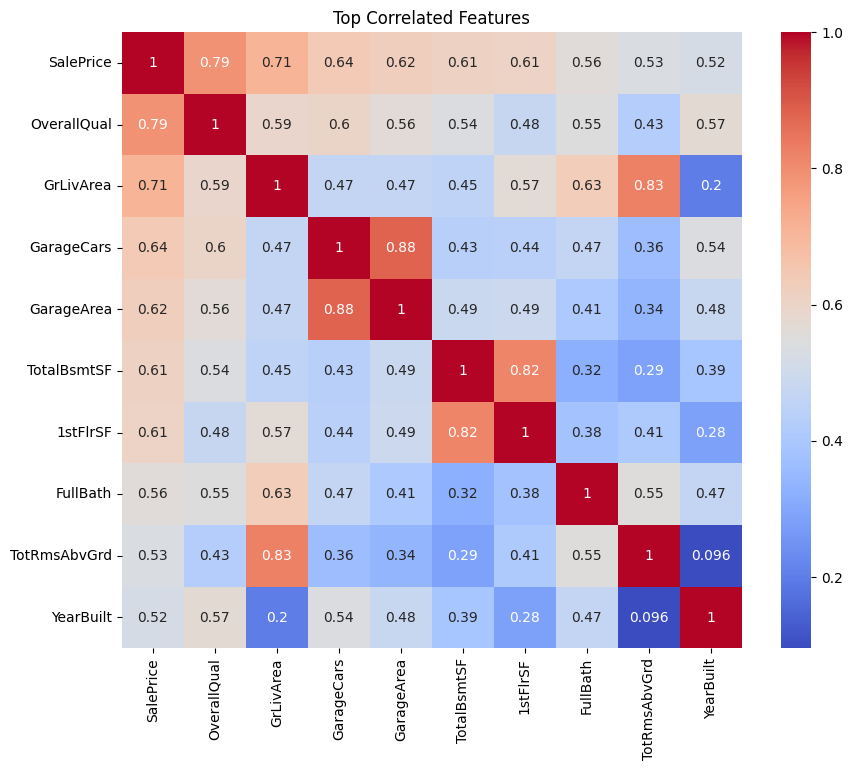

In [14]:
# Plot heatmap of top 10 correlations
top_features = top_corr.index[:10]
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm')
plt.title("Top Correlated Features")
plt.show()


Text(0.5, 1.0, 'GrLivArea vs SalePrice')

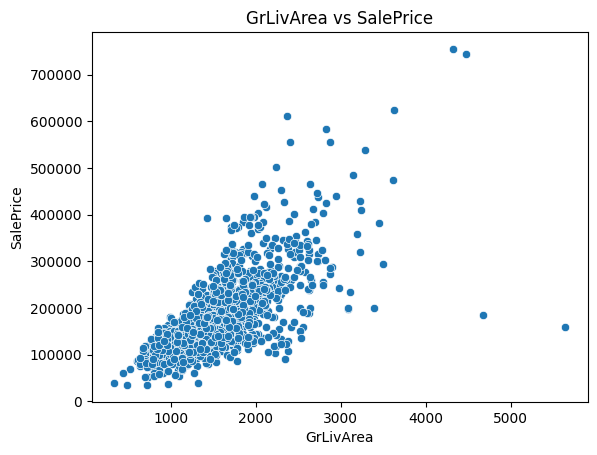

In [15]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title("GrLivArea vs SalePrice")

Text(0.5, 1.0, 'Overall Quality vs SalePrice')

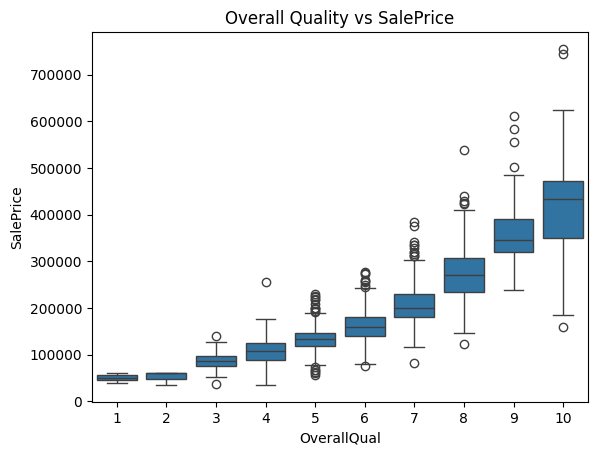

In [16]:
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title("Overall Quality vs SalePrice")

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:


# Select top correlated features
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
            'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']

X = df[features]
y = df['SalePrice']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 39568.64464628703
R² Score: 0.7958786110456302


In [27]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [28]:
import joblib

# Suppose xgb is your final trained model
joblib.dump(model, 'house_price_model.pkl')


['house_price_model.pkl']

In [31]:
import streamlit as st
import numpy as np
import joblib

# Load the saved model
model = joblib.load('house_price_model.pkl')

# Title
st.title("🏠 House Price Prediction App")

# Input fields
st.header("Enter House Features")

OverallQual = st.slider("Overall Quality (1-10)", 1, 10, 5)
GrLivArea = st.number_input("Above Ground Living Area (sq ft)", 500, 5000, 1500)
GarageCars = st.slider("Garage Capacity (cars)", 0, 4, 2)
GarageArea = st.number_input("Garage Area (sq ft)", 0, 1500, 500)
TotalBsmtSF = st.number_input("Total Basement Area (sq ft)", 0, 3000, 800)
FirstFlrSF = st.number_input("1st Floor Area (sq ft)", 0, 3000, 1000)
FullBath = st.slider("Number of Full Bathrooms", 0, 4, 2)
TotRmsAbvGrd = st.slider("Total Rooms Above Ground", 1, 14, 6)
YearBuilt = st.slider("Year Built", 1900, 2025, 2000)

# Predict button
if st.button("Predict Sale Price"):
    input_data = np.array([[OverallQual, GrLivArea, GarageCars, GarageArea,
                            TotalBsmtSF, FirstFlrSF, FullBath, TotRmsAbvGrd, YearBuilt]])
    
    prediction = model.predict(input_data)[0]
    st.success(f"🏡 Estimated Sale Price: ₹{int(prediction):,}")


2025-06-11 14:49:55.828 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 14:49:56.341 
  command:

    streamlit run C:\Users\itzrp\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-11 14:49:56.344 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 14:49:56.346 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 14:49:56.348 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 14:49:56.350 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 14:49:56.351 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 14:49:

In [30]:
pip install streamlit

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ------ --------------------------------- 1.6/9.9 MB 10.3 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.9 MB 15.9 MB/s eta 0:00:01
   ------------------------------- -------- 7.9/9.9 MB 14.4 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.9 MB 14.1 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 12.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/731.2 kB ? eta -:--:--
   --------------------------------------- 731.2/731.2 kB 10.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ------------- -------------------------- 2.4/6.9 MB 17.8 MB/s eta 0:00:01
   ------------------------------- -------- 5.5/6.9 MB 16.4 MB/s eta 0:00:01
   ---------------------------------------- 6.9/6.9 MB 12.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.7 MB ? eta -:--:--
   - --------------------

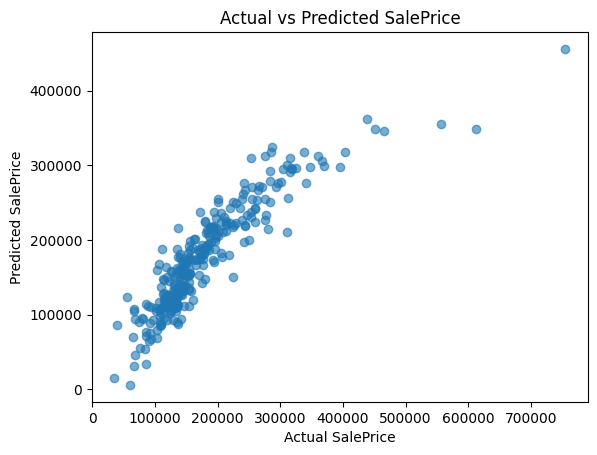

In [32]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice")
plt.show()